In [184]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [185]:
UNSUPERVISED = 'DATASET_IKAN_tanpa_label.csv'
df = pd.read_csv(UNSUPERVISED)

In [186]:
kolom_numerik = [
    'Usia_Mesin_Bulan',
    'Jam_Operasi_Harian',
    'Beban_Muatan_Kg',
    'Suhu_Eksternal_C',
    'Getaran_Mesin_Hz'
]

In [187]:
for kolom in kolom_numerik:
    df[kolom] = df[kolom].replace(',', '.', regex=True).astype(float)

In [188]:
skaler = StandardScaler()
data_distandarkan = skaler.fit_transform(df[kolom_numerik])

In [189]:
KMeans = KMeans(n_clusters = 3, random_state=42)
KMeans.fit(data_distandarkan)
df['cluster'] = KMeans.labels_ 

c:\praktikum 2\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


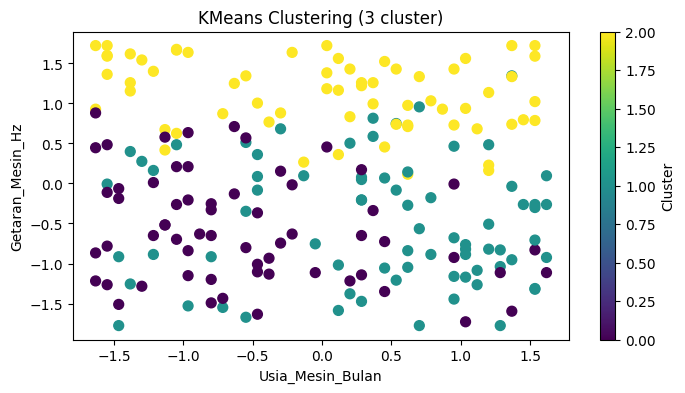

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(data_distandarkan[:, 0], data_distandarkan[:, 2], c=df['cluster'], s=50, cmap='viridis')
plt.xlabel('Usia_Mesin_Bulan')
plt.ylabel('Getaran_Mesin_Hz')
plt.title('KMeans Clustering (3 cluster)')
plt.colorbar(label='Cluster')
plt.show()

In [191]:
df.to_csv('Hasil clustering.csv')
df

,Unnamed: 0,Usia_Mesin_Bulan,Jam_Operasi_Harian,Beban_Muatan_Kg,Suhu_Eksternal_C,Getaran_Mesin_Hz,cluster
0,0,15.0,23.0,406.0,30.0,5.0,1
1,1,15.0,14.0,474.0,35.0,24.0,2
2,2,40.0,24.0,378.0,33.0,5.0,1
3,3,14.0,17.0,283.0,38.0,21.0,0
4,4,33.0,18.0,274.0,31.0,19.0,1
...,...,...,...,...,...,...,...
195,195,32.0,22.0,417.0,29.0,22.0,1
196,196,34.0,16.0,234.0,36.0,17.0,1
197,197,37.0,24.0,267.0,28.0,30.0,1
198,198,39.0,24.0,293.0,36.0,32.0,1


In [192]:
x = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [195]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from collections import Counter

# Check the minimum number of samples in any class
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))

# Use a smaller k_neighbors value (must be less than the smallest class count)
min_samples = min(Counter(y_train).values())
k_neighbors = min(min_samples - 1, 4)  # Ensure k_neighbors is less than the smallest class count
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Class distribution before SMOTE: Counter({32.0: 24, 33.0: 18, 29.0: 18, 28.0: 17, 35.0: 17, 31.0: 16, 30.0: 14, 36.0: 11, 34.0: 10, 37.0: 10, 38.0: 5})


In [196]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [197]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)

accuracy = model.score(x_test, y_test)
report = classification_report(y_test, y_pred, zero_division=1)


In [198]:
print('Accuracy: ', accuracy)
print('Classification Report:\n', report)

Accuracy:  0.05
Classification Report:
               precision    recall  f1-score   support

        28.0       0.00      0.00      1.00         6
        29.0       0.12      0.25      0.17         4
        30.0       0.00      0.00      1.00         2
        31.0       0.00      0.00      1.00         3
        32.0       1.00      0.00      0.00         2
        33.0       1.00      0.00      0.00         7
        34.0       0.14      0.25      0.18         4
        35.0       0.00      0.00      1.00         3
        36.0       0.00      0.00      1.00         4
        37.0       0.00      0.00      1.00         5
        38.0       0.00      1.00      0.00         0

    accuracy                           0.05        40
   macro avg       0.21      0.14      0.58        40
weighted avg       0.25      0.05      0.61        40



In [199]:
label_map = {1: 'optimal', 0: 'perawatan_diperlukan'}

In [200]:
# Create DataFrame with prediction results
result = pd.DataFrame(y_pred, columns=['Prediksi_Getaran_Mesin'])

file_path = 'hasil prediksi naibe bayes.xlsx'
result.to_excel(file_path, index=False)
print('Hasil prediksi disimpan di ', file_path)

Hasil prediksi disimpan di  hasil prediksi naibe bayes.xlsx


In [201]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [202]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

In [203]:
print('Accuracy: ', accuracy)
print('Classification Report:\n', report)

Accuracy:  0.1
Classification Report:
               precision    recall  f1-score   support

        28.0       0.00      0.00      1.00         6
        29.0       0.00      0.00      1.00         4
        30.0       0.50      0.50      0.50         2
        31.0       0.00      0.00      1.00         3
        32.0       0.00      0.00      1.00         2
        33.0       0.00      0.00      1.00         7
        34.0       0.00      0.00      1.00         4
        35.0       0.50      0.33      0.40         3
        36.0       0.00      0.00      1.00         4
        37.0       0.50      0.40      0.44         5
        38.0       0.00      1.00      0.00         0

    accuracy                           0.10        40
   macro avg       0.14      0.20      0.76        40
weighted avg       0.12      0.10      0.86        40



In [204]:
label_map = {1: 'optimal', 0: 'perawatan_diperlukan'}
print('Label Map:', label_map)

result = pd.DataFrame(y_pred, columns=['cluster'])

file_path = 'Hasil prediksi SVM.xlsx'
result.to_excel(file_path, index=False)

print('Hasil prediksi disimpan di ', file_path)

Label Map: {1: 'optimal', 0: 'perawatan_diperlukan'}
Hasil prediksi disimpan di  Hasil prediksi SVM.xlsx


In [205]:
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [206]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

In [207]:
print('Accuracy: ', accuracy)
print('Classification Report:\n', report)

Accuracy:  0.15
Classification Report:
               precision    recall  f1-score   support

        28.0       0.00      0.00      1.00         6
        29.0       0.25      0.25      0.25         4
        30.0       1.00      0.00      0.00         2
        31.0       0.00      0.00      1.00         3
        32.0       0.00      0.00      1.00         2
        33.0       0.17      0.14      0.15         7
        34.0       0.14      0.25      0.18         4
        35.0       0.50      0.33      0.40         3
        36.0       0.00      0.00      1.00         4
        37.0       0.67      0.40      0.50         5
        38.0       0.00      1.00      0.00         0

    accuracy                           0.15        40
   macro avg       0.25      0.22      0.50        40
weighted avg       0.24      0.15      0.54        40

